# Res1D - Export to shapefile (and other useful formats)
MIKE IO 1D supports exporting to shapefile (and other geospatial features) via GeoPandas. To use these features, you will need to ensure GeoPandas and its dependencies are installed.

In [1]:
import mikeio1d

In [2]:
res = mikeio1d.open("../tests/testdata/network.res1d")
res

<mikeio1d.Res1D>

## Read res1d file into a GeoDataFrame (static network only)

In [3]:
# Let's read the network as a geopandas dataframe.
df = res.network.to_geopandas()
df.head()

/home/ryan/mikeio1d/mikeio1d/result_network/result_node.py:54: UserWarning: Accessing IRes1DNode attribute via .node is deprecated. Use ._node.
  warn("Accessing IRes1DNode attribute via .node is deprecated. Use ._node.")
/home/ryan/mikeio1d/mikeio1d/various.py:58: UserWarning: Could not parse projection string. Returning None.
  warnings.warn("Could not parse projection string. Returning None.")
/home/ryan/mikeio1d/mikeio1d/result_network/result_reach.py:223: UserWarning: The 'reaches' property is deprecated. Use 'm1d_reaches' instead.
  warnings.warn("The 'reaches' property is deprecated. Use 'm1d_reaches' instead.")


,group,name,geometry,tag
0,Node,1,POINT (-687934.6 -1056500.699),NaN
1,Node,2,POINT (-687914.8 -1056556.399),NaN
2,Node,3,POINT (-687907.899 -1056507),NaN
3,Node,4,POINT (-687918.199 -1056576.199),NaN
4,Node,5,POINT (-687835.5 -1056565.2),NaN


<Axes: >

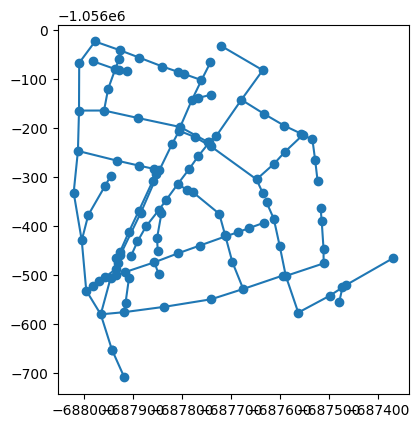

In [4]:
# Now let's plot the network.
df.plot()

## Read res1d into a GeoDataFrame (with quantities)

- To include quantities, you need to go a bit deeper into the network (res.reaches instead of res.network).
- Additionally, you need to specify how you would like to aggregate the results in time (and other dimensions like chainage)

In [5]:
# Here we read the reaches, and choose to get the maximum value of all available quantities.
df_reaches = res.reaches.to_geopandas(agg="max")
df_reaches.head()

/home/ryan/mikeio1d/mikeio1d/result_network/result_reach.py:223: UserWarning: The 'reaches' property is deprecated. Use 'm1d_reaches' instead.
  warnings.warn("The 'reaches' property is deprecated. Use 'm1d_reaches' instead.")
/home/ryan/mikeio1d/mikeio1d/various.py:58: UserWarning: Could not parse projection string. Returning None.
  warnings.warn("Could not parse projection string. Returning None.")


,group,name,tag,geometry,max_WaterLevel,max_Discharge
0,Reach,100l1,0.0-47.7,"LINESTRING (-687887.601 -1056368.901, -687887....",196.808563,0.099751
1,Reach,101l1,0.0-66.4,"LINESTRING (-687859.5 -1056308.7, -687859.5 -1...",196.880066,0.019202
2,Reach,102l1,0.0-10.9,"LINESTRING (-687931.201 -1056476.501, -687931....",196.077560,0.326383
3,Reach,103l1,0.0-26.1,"LINESTRING (-687847.1 -1056498.799, -687847.1 ...",196.522049,0.001056
4,Reach,104l1,0.0-34.4,"LINESTRING (-687631.201 -1056393.199, -687631....",197.072220,0.000025


In [6]:
# Similarly, we can do the same for nodes.
df_nodes = res.nodes.to_geopandas(agg="max")
df_nodes.head()

/home/ryan/mikeio1d/mikeio1d/result_network/result_node.py:54: UserWarning: Accessing IRes1DNode attribute via .node is deprecated. Use ._node.
  warn("Accessing IRes1DNode attribute via .node is deprecated. Use ._node.")


/home/ryan/mikeio1d/mikeio1d/various.py:58: UserWarning: Could not parse projection string. Returning None.
  warnings.warn("Could not parse projection string. Returning None.")


,group,name,geometry,max_WaterLevel
0,Node,1,POINT (-687934.6 -1056500.699),195.669006
1,Node,2,POINT (-687914.8 -1056556.399),195.822968
2,Node,3,POINT (-687907.899 -1056507),195.881500
3,Node,4,POINT (-687918.199 -1056576.199),194.661331
4,Node,5,POINT (-687835.5 -1056565.2),194.793060


<Axes: >

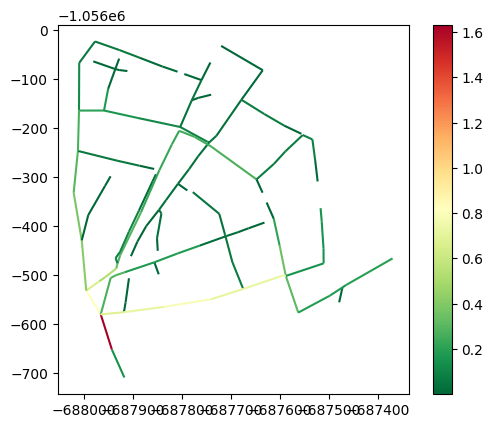

In [7]:
# Now let's plot the max discharge for each reach.
df_reaches.plot(column="max_Discharge", cmap="RdYlGn_r", legend=True)

<Axes: >

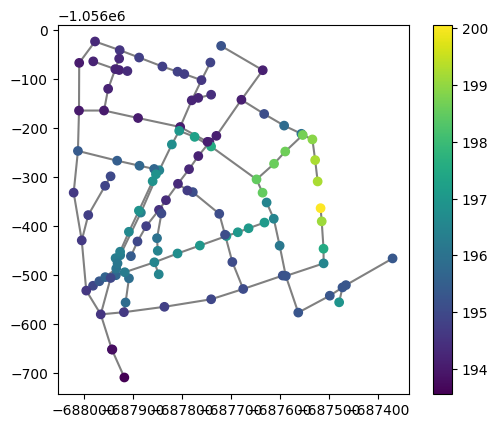

In [8]:
# Similarly, we can do the same for nodes. Note we plot the reaches in the background for context.
ax = df_reaches.plot(color="gray", zorder=-1)
df_nodes.plot(ax=ax, column="max_WaterLevel", legend=True)

In [9]:
# Finally, we look at a similar example but for catchments.
res = mikeio1d.open("../tests/testdata/catchments.res1d")
df_catchments = res.catchments.to_geopandas("max")
df_catchments.head()

/home/ryan/mikeio1d/mikeio1d/result_network/result_catchment.py:51: UserWarning: Accessing IRes1DCatchment attribute via .catchment is deprecated. Use ._catchment.
  warn(


,group,name,geometry,max_TotalRunOff,max_ActualRainfall,max_ZinkLoadRR,max_ZinkMassAccumulatedRR,max_ZinkRR
0,Catchment,100_16_16,"POLYGON ((-687895.163 -1056385.779, -687849.02...",0.215565,0.000011,0.021556,10.661672,100.0
1,Catchment,105_1_1,"POLYGON ((-687467.053 -1056337.76, -687566.378...",0.378048,0.000011,0.037805,18.574373,100.0
2,Catchment,10_22_22,"POLYGON ((-687436.273 -1056620.891, -687515.47...",0.414988,0.000011,0.041499,22.898754,100.0
3,Catchment,113_21_21,"POLYGON ((-687293.487 -1056430.077, -687392.14...",0.395227,0.000011,0.039523,21.803301,100.0
4,Catchment,118_30_30,"POLYGON ((-687912.055 -1056002.872, -688031.24...",0.322125,0.000011,0.032212,17.857996,100.0


<Axes: >

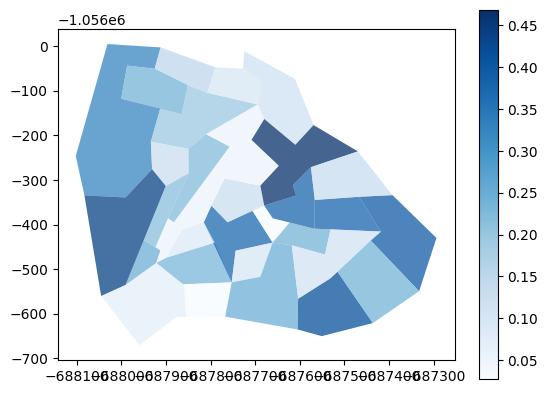

In [10]:
# Let's plot the catchment runoff.
df_catchments.plot(column="max_TotalRunOff", cmap="Blues", legend=True, alpha=0.75)

# Interactive plotting with explore

### Add an interactive plot directly in the notebook

Note: The map does not display on GitHub. You may use https://nbviewer.org/ to properly view the notebook.

In [11]:
map = df_reaches.explore(
    column="max_Discharge",
    legend=True,
    tiles="cartodb positron",
    tooltip=["name", "max_Discharge"],
    popup=True,
)
map

### Save your interactive map into a shareable HTML file

In [12]:
map.save("results.html")

## Export to shapefile

In [13]:
# Shapefile fields are limited to 10 characters.
for df in [df_reaches, df_nodes, df_catchments]:
    df.columns = [col[:10] for col in df.columns]

In [14]:
# Shapefiles require all geometries to be of the same type
df_reaches.to_file("reaches.shp")
df_nodes.to_file("nodes.shp")
df_catchments.to_file("catchments.shp")

/home/ryan/mikeio1d/.venv/lib/python3.12/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/home/ryan/mikeio1d/.venv/lib/python3.12/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


## Clean up

In [15]:
from pathlib import Path

files_to_delete = []
for p in ("results.html", "reaches*", "nodes*", "catchments*"):
    files_to_delete = [*files_to_delete, *Path.glob(Path.cwd(), p)]

for f in files_to_delete:
    f.unlink()